In [102]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv
/kaggle/input/digit-recognizer/sample_submission.csv


In [103]:
train_data = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
test_set = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')


In [104]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [105]:
ytrain=train_data["label"]
xtrain=train_data.drop(labels=["label"],axis=1)
ytrain.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

In [106]:
xtrain.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [107]:
test_set.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [108]:
xtrain=xtrain/255
test=test_set/255

In [109]:
print(type(xtrain),xtrain.shape)
print(type(test),test.shape)

<class 'pandas.core.frame.DataFrame'> (42000, 784)
<class 'pandas.core.frame.DataFrame'> (28000, 784)


In [110]:
xtrain = xtrain.values.reshape(-1,28,28,1)

In [111]:
xtest = test.values.reshape(-1,28,28,1)

In [112]:
from keras.utils.np_utils import to_categorical
ytrain = to_categorical(ytrain, num_classes = 10)

In [113]:
xtrain, xval, ytrain, yval = train_test_split(xtrain, ytrain, test_size = 0.1, random_state=2)

In [114]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

In [115]:
model=Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))


In [116]:
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

In [117]:
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [118]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', patience=3, verbose=1, factor=0.5,  min_lr=0.00001)

In [119]:
epochs=10
batch_size=86

In [120]:
datagen=ImageDataGenerator(featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_epsilon=1e-06,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=None,
    zoom_range=0.1,
    horizontal_flip=False,
    vertical_flip=False
)

In [121]:
datagen.fit(xtrain)

In [122]:
history = model.fit_generator(datagen.flow(xtrain,ytrain, batch_size=batch_size),
                              epochs = epochs, validation_data = (xval,yval),
                              verbose = 2, steps_per_epoch=xtrain.shape[0] // batch_size
                              )

Epoch 1/10
439/439 - 149s - loss: 0.4262 - accuracy: 0.8616 - val_loss: 0.0609 - val_accuracy: 0.9800
Epoch 2/10
439/439 - 150s - loss: 0.1304 - accuracy: 0.9610 - val_loss: 0.0495 - val_accuracy: 0.9836
Epoch 3/10
439/439 - 151s - loss: 0.0946 - accuracy: 0.9721 - val_loss: 0.0300 - val_accuracy: 0.9898
Epoch 4/10
439/439 - 153s - loss: 0.0786 - accuracy: 0.9767 - val_loss: 0.0335 - val_accuracy: 0.9902
Epoch 5/10
439/439 - 150s - loss: 0.0725 - accuracy: 0.9786 - val_loss: 0.0282 - val_accuracy: 0.9902
Epoch 6/10
439/439 - 150s - loss: 0.0634 - accuracy: 0.9815 - val_loss: 0.0256 - val_accuracy: 0.9921
Epoch 7/10
439/439 - 151s - loss: 0.0602 - accuracy: 0.9828 - val_loss: 0.0191 - val_accuracy: 0.9938
Epoch 8/10
439/439 - 156s - loss: 0.0603 - accuracy: 0.9829 - val_loss: 0.0267 - val_accuracy: 0.9914
Epoch 9/10
439/439 - 150s - loss: 0.0587 - accuracy: 0.9837 - val_loss: 0.0417 - val_accuracy: 0.9874
Epoch 10/10
439/439 - 149s - loss: 0.0590 - accuracy: 0.9838 - val_loss: 0.0435 - 

KeyError: 'acc'

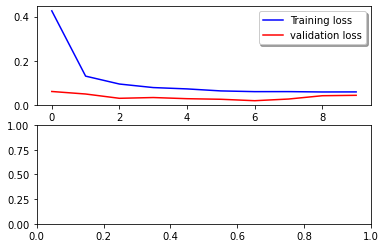

In [123]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

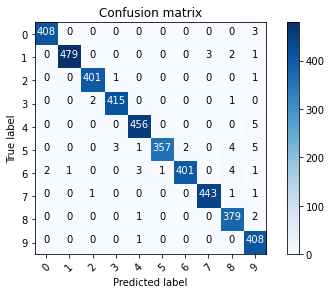

In [125]:
import itertools
def plot_confusion_matrix(cm, classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
ypred = model.predict(xval)
# Convert predictions classes to one hot vectors 
y_pred = np.argmax(ypred,axis = 1) 
# Convert validation observations to one hot vectors
y_val = np.argmax(yval,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(y_val,y_pred) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10)) 


In [126]:
results = model.predict(xtest)
results = np.argmax(results,axis = 1)
results = pd.Series(results,name="Label")

In [127]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)
submission.to_csv("cnn_mnist_datagen.csv",index=False)